# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**


* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины. Правила переноса дедлайнов определены в презентации с первого занятия.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Задачи 1 и 2 сдаются в систему Яндекс.Контест. Ссылка на контест в телеграм-боте.


**Сдача задачи 3:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 10 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 80 баллов


Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 2.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

На дополнительном занятии 10 февраля будет показан простой пример работы с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных обучить несколько классификаторов для определения выживших, иначе говоря, получить некоторые приближенные правила определения, выжил пассажир или нет, а также сравнить эти правила по качеству приближения.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [2]:
data = pd.read_csv('train.csv', index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.3, random_state=42)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [4]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [5]:
train_X, train_y = get_features_and_target(train_set)
test_X, test_y = get_features_and_target(test_set)
train_X

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
446,1,male,4.0,0,2,81.8583
651,3,male,NaN,0,0,7.8958
173,3,female,1.0,1,1,11.1333
451,2,male,36.0,1,2,27.7500
315,2,male,43.0,1,1,26.2500
...,...,...,...,...,...,...
107,3,female,21.0,0,0,7.6500
271,1,male,NaN,0,0,31.0000
861,3,male,41.0,2,0,14.1083


#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков.*

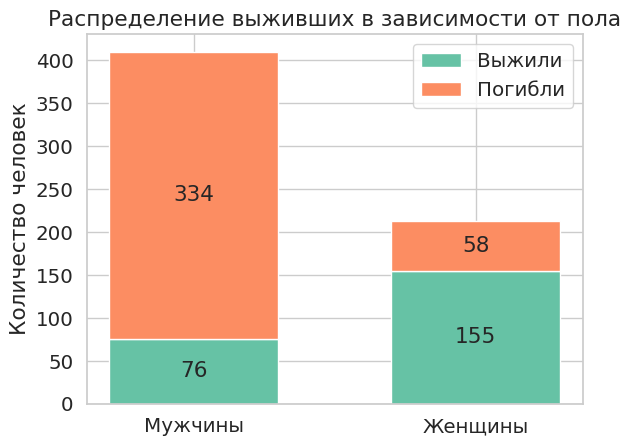

In [6]:
import matplotlib.pyplot as plt

# Посчитаем общее количество мужчин и женщин, а также количество выживших
males_total = len(train_set.loc[(train_set['Sex'] == 'male')])
females_total = len(train_set.loc[(train_set['Sex'] == 'female')])
males_survived = len(train_set.loc[((train_set['Sex'] == 'male') & (train_set['Survived'] == 1))])
females_survived = len(train_set.loc[((train_set['Sex'] == 'female') & (train_set['Survived'] == 1))])

#Визуализируем
survivors_counts = {
    'Выжили': [males_survived, females_survived],
    'Погибли': [males_total-males_survived, females_total-females_survived]
}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for key, count in survivors_counts.items():
    p = ax.bar(('Мужчины', 'Женщины'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от пола')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

Процент выживших женщин гораздо больше, чем процент выживших мужчин

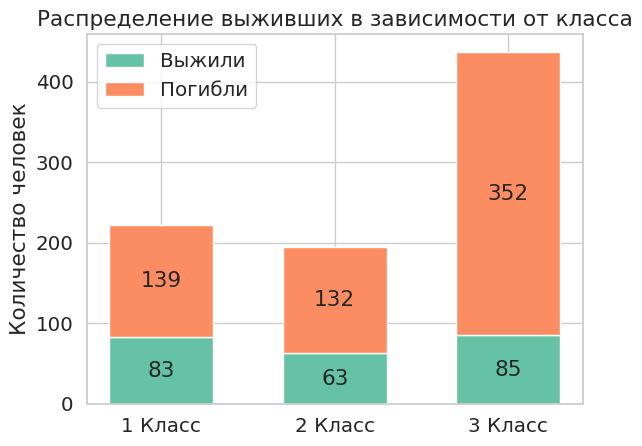

In [7]:

class1_total = len(train_set.loc[(train_set['Pclass'] == 1)])
class2_total = len(train_set.loc[(train_set['Pclass'] == 2)])
class3_total = len(train_set.loc[(train_set['Pclass'] == 3)])
class1_survived = len(train_set.loc[((train_set['Pclass'] == 1) & (train_set['Survived'] == 1))])
class2_survived = len(train_set.loc[((train_set['Pclass'] == 2) & (train_set['Survived'] == 1))])
class3_survived = len(train_set.loc[((train_set['Pclass'] == 3) & (train_set['Survived'] == 1))])

survivors_counts = {
    'Выжили': [class1_survived, class2_survived, class3_survived],
    'Погибли': [class1_total, class2_total, class3_total]
}

fig, ax = plt.subplots()
bottom = np.zeros(3)

for key, count in survivors_counts.items():
    p = ax.bar(('1 Класс', '2 Класс', '3 Класс'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от класса')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

Процент выживших из 1 и 2 классов значительно выше, чем для 3 класса. Соответственно тот, кто больше заплатил за билет, тот с большей вероятностью остался жив

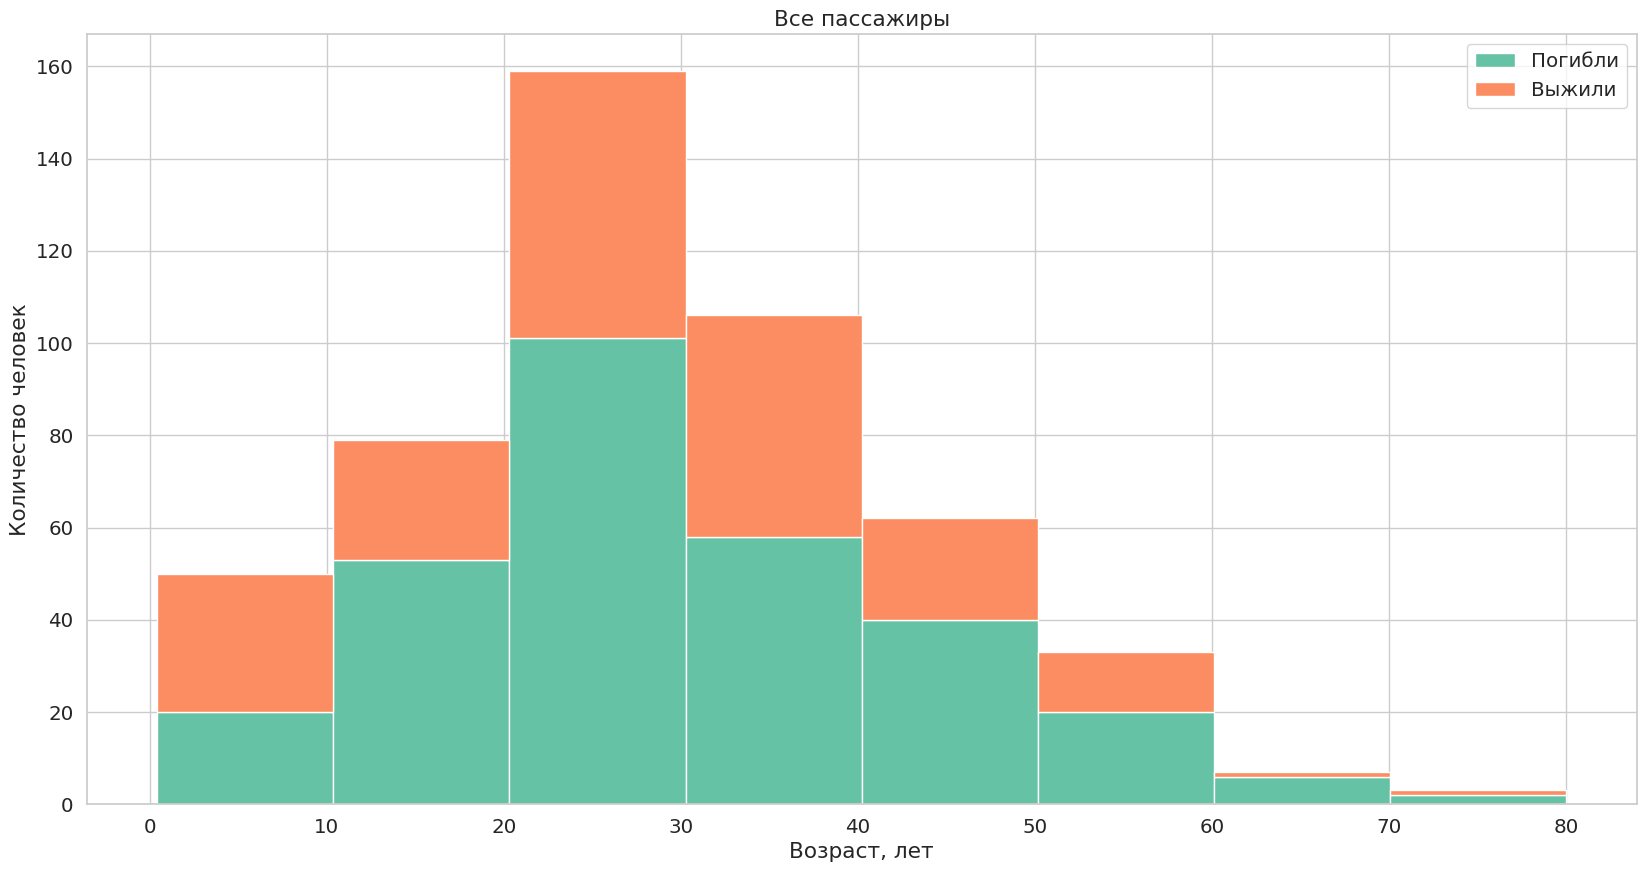

In [8]:
from collections import Counter

#Выберем списки пассжиров в отдельные группы
survivors = train_set.loc[(train_set['Survived'] == 1)]
died = train_set.loc[(train_set['Survived'] == 0)]
#Число возрастов
num_of_ages = len(dict(Counter(survivors['Age'])).keys())
#Визуализируем
fig, axs = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(10)
axs.hist([died['Age'], survivors['Age']], bins=8, stacked=True, label=['Погибли', 'Выжили'])
axs.set_title('Все пассажиры')
axs.set_xlabel('Возраст, лет')
axs.set_ylabel('Количество человек')
axs.legend()



Возраст почти не влияет на выживаемость, за исключением детей, и то не для всех возрастов

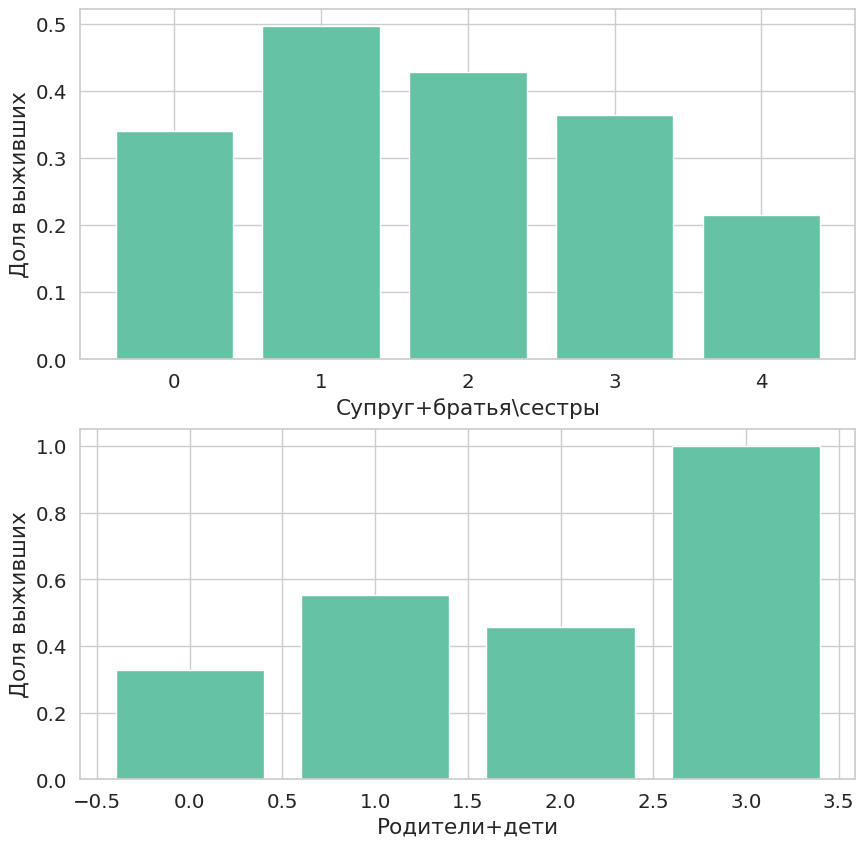

In [9]:
from collections import Counter


sibsp_total = dict(Counter(train_set.SibSp))
parch_total = dict(Counter(train_set.Parch))
sibsp_survived = dict(Counter(train_set.loc[(train_set['Survived'] == 1)].SibSp))
parch_survived = dict(Counter(train_set.loc[(train_set['Survived'] == 1)].Parch))
relatives = (sibsp_total, parch_total)
relatives_survived = (sibsp_survived, parch_survived)

fig, axs = plt.subplots(2, 1, figsize=(10,10))
xlabs = ('Супруг+братья\сестры', 'Родители+дети')
for i in range(2):
    probs = []
    for rel, amount in relatives_survived[i].items():
        probs.append(amount / relatives[i][rel])
    axs[i].bar(relatives_survived[i].keys(), probs)
    axs[i].set_ylabel('Доля выживших')
    axs[i].set_xlabel(xlabs[i])
plt.show()

Количество родственников на борту не очень понятно как влияет. С одной стороны из тех, у кого больше 4 родственников не выжил никто, с другой стороны таких людей довольно мало. Можно сказать, что имеется связь иеется, но данных недостаточно, чтобы быть абсолютно в этом уверенным

Будем считать, что цена билета маленькая, если она меньше 7.9 фунтов.

Цена билета средняя, если она от 7.9 до 14.45 фунтов.

Цена билета средне-высокая, если она от 14.45 до 31.28 фунтов.

И высокая, если выше 31.28 фунтов

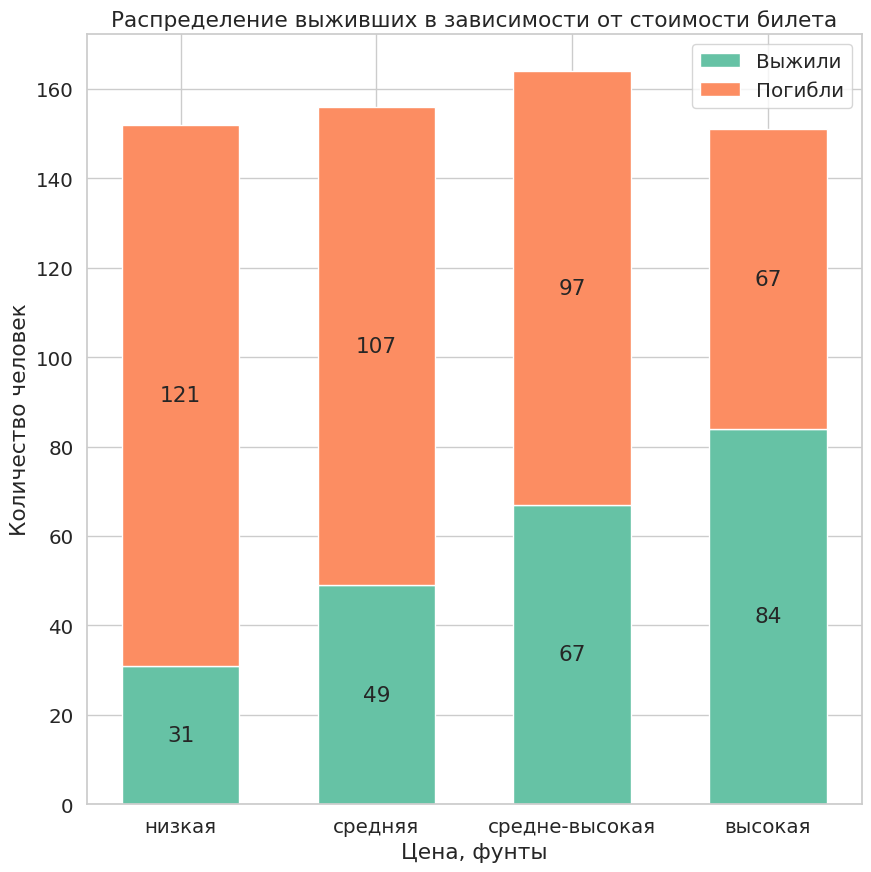

In [ ]:
low_survivors = len(train_set.loc[(train_set['Fare'] < 7.9) & (train_set['Survived'] == 1)])
low_died = len(train_set.loc[(train_set['Fare'] < 7.9) & (train_set['Survived'] == 0)])
mid_survivors = len(train_set.loc[(train_set['Fare'] >= 7.9) & (train_set['Fare'] < 14.45) & (train_set['Survived'] == 1)])
mid_died = len(train_set.loc[(train_set['Fare'] >= 7.9) & (train_set['Fare'] < 14.45) & (train_set['Survived'] == 0)])
high_mid_survivors = len(train_set.loc[(train_set['Fare'] >= 14.45) & (train_set['Fare'] < 31.28) & (train_set['Survived'] == 1)])
high_mid_died = len(train_set.loc[(train_set['Fare'] >= 14.45) & (train_set['Fare'] < 31.28) & (train_set['Survived'] == 0)])
high_survivors = len(train_set.loc[(train_set['Fare'] > 31.28) & (train_set['Survived'] == 1)])
high_died = len(train_set.loc[(train_set['Fare'] > 31.28) & (train_set['Survived'] == 0)])

survivors_counts = {
    'Выжили': [low_survivors, mid_survivors, high_mid_survivors, high_survivors],
    'Погибли': [low_died, mid_died, high_mid_died, high_died]
}

fig, ax = plt.subplots(figsize=(10,10))
bottom = np.zeros(4)

for key, count in survivors_counts.items():
    p = ax.bar(('низкая', 'средняя', 'средне-высокая', 'высокая'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от стоимости билета')
ax.set_ylabel('Количество человек')
ax.set_xlabel('Цена, фунты')
ax.legend()
plt.show()

Посмотрим на корреляцию между признаками

<ipython-input-10-ab1862b961a8>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_cop.corr(), cmap='YlGnBu', annot=True)


<Axes: >

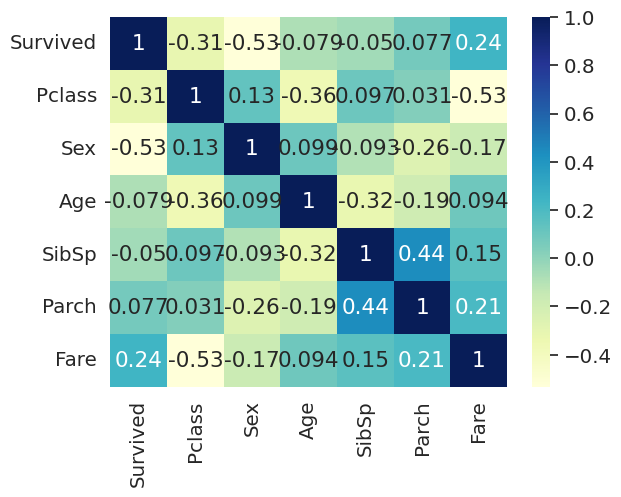

In [10]:
import seaborn as sns

data_cop = train_set.copy()
data_cop = data_cop.replace(['male', 'female'], [1, 0])
sns.heatmap(data_cop.corr(), cmap='YlGnBu', annot=True)

Видно, что самая большая корреляция у выживаемости(по модулю) с полом, классом и ценой билета.

#### 3. Классификация методом ближайшего соседа

Ранее в контесте вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи.

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`.

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

Функция расстояния: Евклидово расстояние.

Перед использованием knn данные нужно отнормировать, потому что они имеют разный масштаб. Так же нужно избавиться от пропусков в возрастах и цене билета, для этого заполним пропуски средним значением.

P.S возможно имело бы смысл взять метрику: сумма квадратов с корреляционными весами, но это бы не помогло сильно улучшить результат

In [ ]:
def data_prepare(train, test):
    train_X[['Age', 'Fare']] = train_X[['Age', 'Fare']].fillna(train_X[['Age', 'Fare']].mean())
    test_X[['Age', 'Fare']] = test_X[['Age', 'Fare']].fillna(train_X[['Age', 'Fare']].mean())
    norm_train = (train_X[['Age', 'Fare']] - train_X[['Age', 'Fare']].mean())/train_X[['Age', 'Fare']].std()
    norm_test = (test_X[['Age', 'Fare']] - train_X[['Age', 'Fare']].mean())/test_X[['Age', 'Fare']].std()
    return norm_train, norm_test

norm_train, norm_test = data_prepare(train_X, test_X)

In [12]:
def find_index(data):
    copy = pd.DataFrame(data.copy())
    copy.reset_index(inplace=True)
    copy.index.name='PassengerId'
    return np.array(copy['PassengerId'])


def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:
    c = A[['Fare']].to_numpy()[np.newaxis, :, :]
    d = B[['Fare']].to_numpy()[:, np.newaxis, :]
    e = np.sum(np.square(d-c), axis=2).argsort(axis=1)
    return np.delete(e, np.s_[k:len(e[0])], axis=1)


def knn(features, train_features, train_target, k=1):
    ind = find_index(features)
    answer = np.array([])
    neighbours = find_nearest_points(train_features, features, k)
    for poins in neighbours:
        count1 = 0
        count0 = 0
        for n in poins:
            if (train_target.to_numpy()[n] == 1):
                count1 += 1
            else:
                count0 += 1
        if (count1 > count0):
            answer = np.append(answer, 1)
        else:
            answer = np.append(answer, 0)
    target = pd.Series(answer, index=np.array(ind))
    return target

Функция для проверки качества: доля правильных результатов

In [20]:
def score(test_y, predicted):
    data_copy = test_y.copy()
    data_copy = data_copy[data_copy == predicted]
    return len(data_copy) / len(test_y)

Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

In [21]:
print('Качество для k=5',"{:.2}".format(score(test_y, knn(norm_test, norm_train, train_y, 5))))
print('Качество для k=55',"{:.2}".format(score(test_y, knn(norm_test, norm_train, train_y, 55))))
print('Качество для k=555',"{:.2}".format(score(test_y, knn(norm_test, norm_train, train_y, 555))))

Качество для k=5 0.64
Качество для k=55 0.67
Качество для k=555 0.59


Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы?

Можно учесть такие признаки как пол и класс пассажиров, проблема связанная с этими признаками заключается в том, что они категориальные и соответственно их нужно будет как то кодировать

Строить классификатор с другими признаками при этом не нужно.

#### 4. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

По графикам видно, что люди из 1 и 2 класса выживают гораздо лучше, чем люди из 3 класса. Это и будет первым логическим делением. Будем считать, что люди из 1 и 2 выживают. Будем считать, что люди из 3 класса погибают если им больше 20 и выживают в противном случае.

In [15]:
def tree_one(features):
    ind = find_index(features)
    answer = np.array([])
    for i in ind:
        if (features['Pclass'][i] == 1 or features['Pclass'][i] == 2):
            answer = np.append(answer, 1)
        else:
            if (features['Age'][i] > 20):
                answer = np.append(answer, 0)
            else:
                answer = np.append(answer, 1)
    predicted = pd.Series(answer, index=np.array(ind))
    return predicted

**Дерево 2:**

Из соотношения выживаемости мужчин и женщин видно, что почти все мужчины погибают, а почти все женщины выживают

In [27]:
def tree_two(features):
    ind = find_index(features)
    answer = np.array([])
    for i in ind:
        if (features['Sex'][i] == 'male'):
            answer = np.append(answer, 0)
        else:
            answer = np.append(answer, 1)
    predicted = pd.Series(answer, index=np.array(ind))
    return predicted

#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Доля правильных предсказаний

Реализуйте данный критерий по шаблону

Данный критерий реализован выше в коде

Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

Для knn качество оценено выше

**Качество первого дерева**

In [23]:
predicted = tree_one(test_X)
print('Качество первого дерева', "{:.2}".format(score(test_y, predicted)))

Качество первого дерева 0.63


**Качество второго дерева**

In [28]:
predicted = tree_two(test_X)
print('Качество второго дерева', "{:.2}".format(score(test_y, predicted)))

Качество второго дерева 0.79


Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

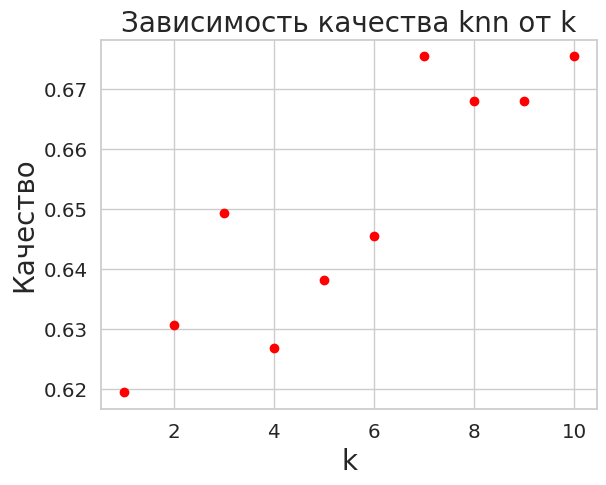

In [19]:
quality = [score(test_y, knn(norm_test, norm_train, train_y, i)) for i in range(1, 11)]
plt.figure()
plt.plot(np.arange(1, 11), quality, 'ro')
plt.ylabel(r'Качество', fontsize=20)
plt.xlabel(r'k', fontsize=20)
plt.title('Зависимость качества knn от k', fontsize=20)
plt.show()

#### 6. Выводы

Исходя из графиков можно сделать несколько выводов:

1.   Процент выживших женщин гораздо больше, чем процент выживших мужчин
2.   Процент выживших из 1 и 2 классов значительно выше, чем для 3 класса. Соответственно тот, кто больше заплатил за билет, тот с большей вероятностью остался жив
3.   Возраст почти не влияет на выживаемость, за исключением детей, и то не для всех возрастов
4.   Количество родственников на борту не очень понятно как влияет. С одной стороны из тех, у кого больше 4 родственников не выжил никто, с другой стороны таких людей довольно мало. Можно сказать, что имеется связь иеется, но данных недостаточно, чтобы быть абсолютно в этом уверенным

Работа knn: судя по качеству модели, применять knn в данном случае на возрасте и плате за проезд не стоит. Можно предположить, что если убрать возраст и заменить его на пол или класс места пассажира, то показатели работы модели увеличатся, так как эти показатели гораздо лучше указывают на выживаемость, чем возраст

Решающие деревья: из-за того, что ярковыраженных показателей, позволяющих понять выжил человек или нет, не так много, то и качество работы деревьев не очень хорошее. Из работы первого дерева можно сделать вывод, что класс пассажира и возраст детей влияют на то, выжил человек или нет, но делают это довольно слабо. Из работы второго дерева можно сделать вывод, что если считать, что все мужчины умерли, а все женщины выжили, то такая модель имеет наилучшую предсказательную способность из всех, что получались в этом задании, но все равно не очень высокую






